### Expectation Value, E[x], $\mu$

E[x] of a random variable x is the mean of x. It is not a function of x, but depends on the form of the PDF, f(x).

$$E[x]=\int_{-\infty}^{\infty} xf(x)dx=\mu$$

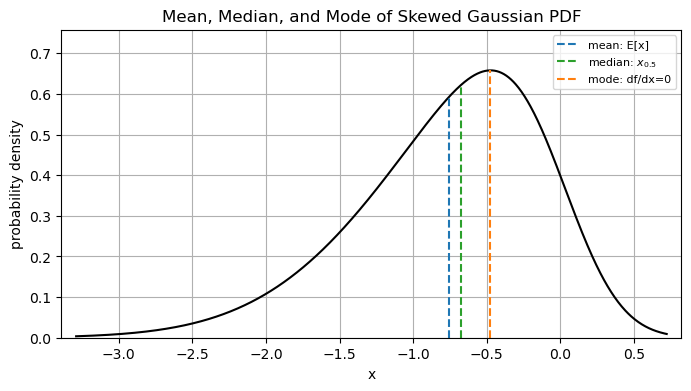

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm
from scipy.signal import find_peaks

a = -3  # skewness parameter
m = 0   # mean of unskewed gaussian pdf
s = 1   # std dev
size = 999
x = np.linspace(skewnorm.ppf(1/(size+1), a), skewnorm.ppf(1-1/(size+1), a), size)
pdf = skewnorm.pdf(x, a, loc=m, scale=s)

meanx = sum(x*pdf)/sum(pdf)
meany = skewnorm.pdf(meanx, a, loc=m, scale=s)
medianx = skewnorm.median(a, loc=m, scale=s)
mediany = skewnorm.pdf(medianx, a, loc=m, scale=s)
peak, _ = find_peaks(pdf)
modex = x[peak[0]]
modey = pdf[peak[0]]

plt.figure(figsize=(8, 4))
plt.plot(x, pdf, color='black')
plt.plot([meanx,meanx], [0,meany], color='#1f77b4', linestyle='--', label='mean: E[x]')
plt.plot([medianx,medianx], [0,mediany], color='#2ca02c', linestyle='--', label='median: $x_{0.5}$')
plt.plot([modex,modex], [0,modey], color='#ff7f0e', linestyle='--', label='mode: df/dx=0')
plt.title("Mean, Median, and Mode of Skewed Gaussian PDF")
plt.xlabel("x")
plt.ylabel("probability density")
plt.gca().set_xlim([min(x)-0.1, max(x)+0.1])
plt.gca().set_ylim([0, max(pdf)+0.1])
plt.legend(fontsize=8)
plt.grid()
plt.show()


### Variance, V[x] $\sigma^2$

The second central moment of the random variable x is called the population variance (or just variance), It is a measure of how widely x is spread about its mean value. 

$$V[x]=E[(x-E[x])^2]=\int_{-\infty}^{\infty} (x-\mu)^2f(x)dx=\sigma^2$$

The square root of the variance, $\sigma$ is called the standard deviation. 

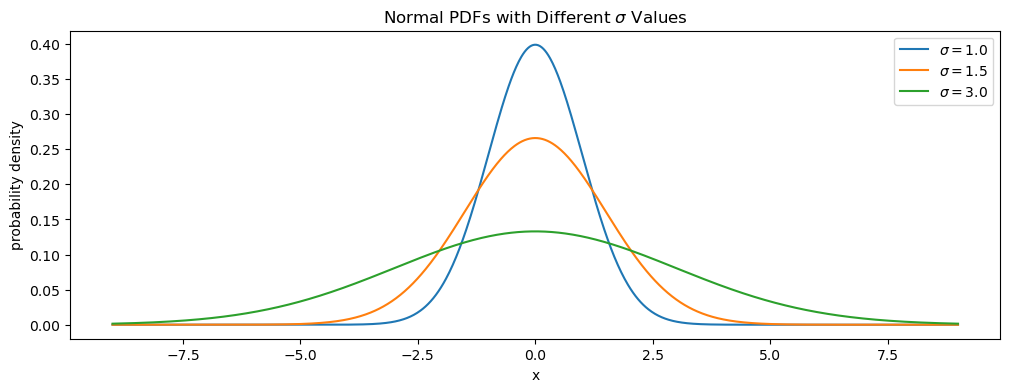

In [3]:
from scipy.stats import norm

mean = 0
std1 = 1
std2 = 1.5
std3 = 3

x = np.linspace(mean-3*std3, mean+3*std3, 1000)
pdf1 = norm.pdf(x, mean, std1)
pdf2 = norm.pdf(x, mean, std2)
pdf3 = norm.pdf(x, mean, std3)

plt.figure(figsize=(12, 4))
plt.plot(x, pdf1, label=fr'$\sigma={std1:.1f}$')
plt.plot(x, pdf2, label=fr'$\sigma={std2:.1f}$')
plt.plot(x, pdf3, label=fr'$\sigma={std3:.1f}$')
plt.xlabel('x')
plt.ylabel('probability density')
plt.title('Normal PDFs with Different $\\sigma$ Values')
plt.legend()
plt.show()

### 68–95–99.7 Rule (Empirical Rule)

For an approximately normal data set:

$$P(\mu-1\sigma \leq x \leq \mu+1\sigma) \approx \%68$$
$$P(\mu-2\sigma \leq x \leq \mu+2\sigma) \approx \%95$$
$$P(\mu-3\sigma \leq x \leq \mu+3\sigma) \approx \%99.7$$

Treating $3\sigma$ as near certainty (99.7%) is a common and useful approximation in empirical sciences. \
In the social sciences, a confidence level of 95% (a $2\sigma$ effect) is frequently used as a threshold for statistical significance. \
In particle physics and astrophysics, a $5\sigma$ effect is the conventional threshold for claiming a discovery. This corresponds to a confidence level of 99.99994%.

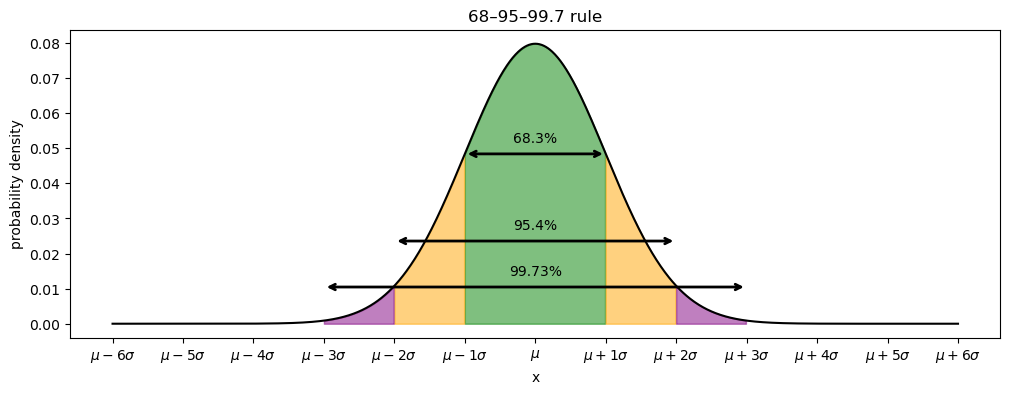

In [5]:
# parameters
mean = 0
std  = 5
size = 1201

# calculate pdf and cdf
x = np.linspace(mean-6*std, mean+6*std, size)
pdf = norm.pdf(x, mean, std)

# probabilities that correspond to std intervals
p_68  = norm.cdf(mean+1*std, mean, std) - norm.cdf(mean-1*std, mean, std)
p_95  = norm.cdf(mean+2*std, mean, std) - norm.cdf(mean-2*std, mean, std)
p_997 = norm.cdf(mean+3*std, mean, std) - norm.cdf(mean-3*std, mean, std)

# indices where x is equal to ...
i      = int(np.where(x==mean)[0][0])
i1_68  = int(np.where(x==mean-1*std)[0][0])
i2_68  = int(np.where(x==mean+1*std)[0][0])
i1_95  = int(np.where(x==mean-2*std)[0][0])
i2_95  = int(np.where(x==mean+2*std)[0][0])
i1_997 = int(np.where(x==mean-3*std)[0][0])
i2_997 = int(np.where(x==mean+3*std)[0][0])

# plot pdf
plt.figure(figsize=(12, 4))
plt.plot(x, pdf, color='black')

# fill each std interval with different colors
plt.fill_between(x[i1_68 : i2_68], pdf[i1_68 : i2_68], color="green", alpha=0.5)
plt.fill_between(x[i1_95 : i1_68], pdf[i1_95 : i1_68], color="orange", alpha=0.5)
plt.fill_between(x[i2_68 : i2_95], pdf[i2_68 : i2_95], color="orange", alpha=0.5)
plt.fill_between(x[i1_997: i1_95], pdf[i1_997: i1_95], color="purple", alpha=0.5)
plt.fill_between(x[i2_95 :i2_997], pdf[i2_95 :i2_997], color="purple", alpha=0.5)

# custom labels for x-axis
ticks = list(range(-30, 31, 5))
labels = [fr'$\mu{i}\sigma$' for i in range(-6, 0)] + \
         [fr'$\mu+{i}\sigma$' for i in range(1, 7)]
labels.insert(len(labels) // 2, r'$\mu$')
plt.xticks(ticks=ticks, labels=labels)

# add annotations
more = max(pdf)/25
plt.annotate('', xy=(x[i1_68],  pdf[i1_68]),  xytext=(x[i2_68],  pdf[i1_68]),  
             arrowprops=dict(arrowstyle='<->',linewidth=2))
plt.annotate('', xy=(x[i1_95],  pdf[i1_95]+4*more),  xytext=(x[i2_95],  pdf[i1_95]+4*more),  
             arrowprops=dict(arrowstyle='<->',linewidth=2))
plt.annotate('', xy=(x[i1_997], pdf[i1_997]+3*more), xytext=(x[i2_997], pdf[i1_997]+3*more), 
             arrowprops=dict(arrowstyle='<->',linewidth=2))
plt.annotate(f"{100*p_68 :.1f}%", xy=(x[i], pdf[i1_68] +more), ha='center')
plt.annotate(f"{100*p_95 :.1f}%", xy=(x[i], pdf[i1_95] +5*more), ha='center')
plt.annotate(f"{100*p_997:.2f}%", xy=(x[i], pdf[i1_997]+4*more), ha='center')

plt.title('68–95–99.7 rule')
plt.xlabel('x')
plt.ylabel('probability density')
plt.show()

### Z-Transform (Standardization)

All x values are standardized with this transformation. This is used for comparing two different samples.

$$z=\frac{x-\mu}{\sigma}$$
$$E[z]=\frac{1}{\sigma}E[x-\mu]=\frac{1}{\sigma}(\mu-\mu)=0$$
$$V[z]=\frac{1}{\sigma^2}V[x-\mu]=\frac{1}{\sigma^2}V[x]=\frac{1}{\sigma^2}\sigma^2=1$$

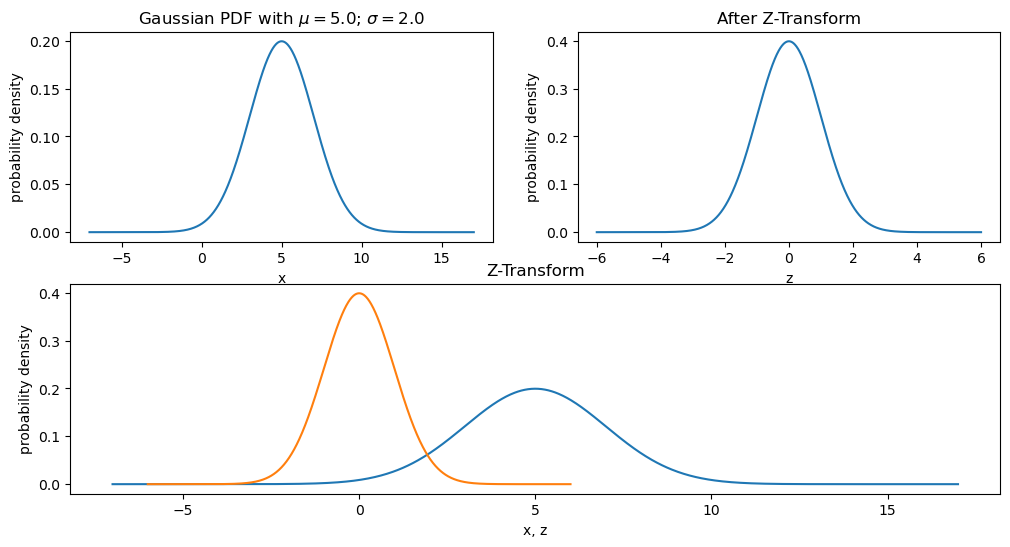

In [4]:
import matplotlib.gridspec as gridspec

mean = 5
std = 2

x = np.linspace(mean-6*std, mean+6*std, 1000)
z = (x-mean)/std
pdf  = norm.pdf(x, mean, std)
zpdf = norm.pdf(z, 0, 1)

fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0:2])

ax1.plot(x, pdf)
ax1.set_xlabel('x')
ax1.set_ylabel('probability density')
ax1.set_title(fr'Gaussian PDF with $\mu={mean:.1f}$; $\sigma={std:.1f}$')

ax2.plot(z, zpdf)
ax2.set_xlabel('z')
ax2.set_ylabel('probability density')
ax2.set_title('After Z-Transform')

ax3.plot(x, pdf)
ax3.plot(z, zpdf)
ax3.set_xlabel('x, z')
ax3.set_ylabel('probability density')
ax3.set_title('Z-Transform')

plt.show()

### Covariance



### Correlation Coefficient



### Skewness




### Kurtosis




References

[1] Dominic Hirschbühl, Advanced Data Analysis Lecture Notes \
[2] Glen Cowan, Statistical Data Analysis, Oxford University Press \
[3] https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule \
[4] http://www.statistics4u.info/fundstat_eng/ee_ztransform.html